In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\kulde\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('Cutlets.csv')
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
df.shape

(35, 2)

In [4]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


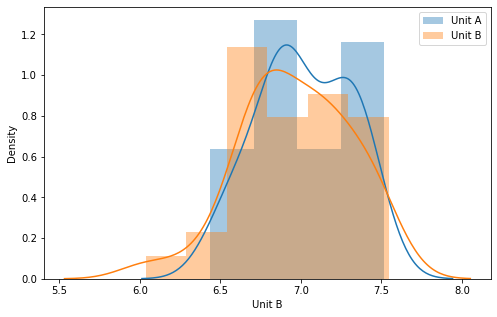

In [5]:
plt.figure(figsize=(8,5))
sns.distplot(df['Unit A'],kde=True,label='Unit A')
sns.distplot(df['Unit B'],hist=True, label='Unit B')
plt.legend()

# Hypothsis testing

In [6]:
stats.ttest_ind(df['Unit A'],df['Unit B'],alternative= 'two-sided')

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

# Therefore null hypothesis is true

# ----------------------------------------------------------------------------------

Q.2. A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.

Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [8]:
data=pd.read_csv('LabTAT.csv')
data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [9]:
data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


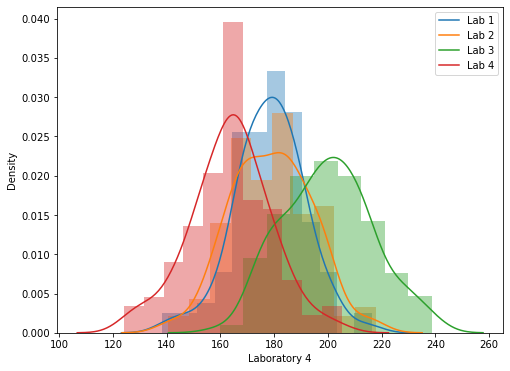

In [10]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(data['Laboratory 1'], kde = True)
sns.distplot(data['Laboratory 2'],hist = True)
sns.distplot(data['Laboratory 3'],hist = True)
sns.distplot(data['Laboratory 4'],hist = True)
plt.legend(labels)

In [11]:
stats.f_oneway(data['Laboratory 1'],data['Laboratory 2'],data['Laboratory 3'],data['Laboratory 4'])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

# Therefore there is difference between TAT reports

# ---------------------------------------------------------------------------------------

# Q.3

In [15]:
buyer=pd.read_csv('BuyerRatio.csv')
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [16]:
buyer.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


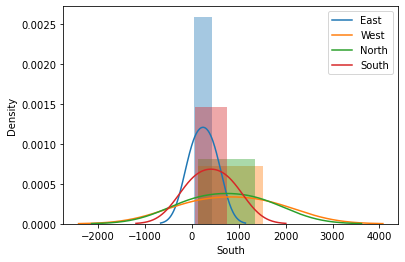

In [17]:
sns.distplot(buyer['East'])
sns.distplot(buyer['West'])
sns.distplot(buyer['North'])
sns.distplot(buyer['South'])
plt.legend(['East','West','North','South'])

In [18]:
test_statistic, p_value, degree_of_freedom, Expected_Values = scipy.stats.chi2_contingency(buyer.iloc[:,1:])

In [19]:
test_statistic,p_value

(1.595945538661058, 0.6603094907091882)

p_value is greater than alpha

# Therefore Null hypothesis is True

# -------------------------------------------------------------------------------

# Q.4. TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [21]:
df1=pd.read_csv('Costomer+OrderForm.csv')
df1

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [22]:
df1.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [24]:
df1['Phillippines'].value_counts(),df1['Indonesia'].value_counts(),df1['Malta'].value_counts(),df1['India'].value_counts()

(Error Free    271
 Defective      29
 Name: Phillippines, dtype: int64,
 Error Free    267
 Defective      33
 Name: Indonesia, dtype: int64,
 Error Free    269
 Defective      31
 Name: Malta, dtype: int64,
 Error Free    280
 Defective      20
 Name: India, dtype: int64)

In [25]:
contingency_table = [271,267,269,280],[23,33,31,20]
contingency_table

([271, 267, 269, 280], [23, 33, 31, 20])

H0 : M1=M2=M3=M4

H1 : Atleast One of them is Differente

So 5% significance means alpha = 0.05

In [27]:
test_statistic, p_value, degree_of_freedom, Expected_Values = scipy.stats.chi2_contingency(contingency_table)

In [29]:
print("Statistics = ",test_statistic,"\n",'P_Value = ', p_value,'\n', 'degree of freedom =', degree_of_freedom,'\n', 'Expected_Values = ', Expected_Values) 

Statistics =  4.623571517181274 
 P_Value =  0.20152929886104046 
 degree of freedom = 3 
 Expected_Values =  [[267.65326633 273.11557789 273.11557789 273.11557789]
 [ 26.34673367  26.88442211  26.88442211  26.88442211]]


In [30]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [31]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = degree_of_freedom)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


p_value is greater than alpha

# Therefore Null hypothesis is True